In [4]:
import numpy as np 
import pandas as pd 
# visulaization
import matplotlib.pyplot as plt
import seaborn as sns
#for Normalization
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
#handling categorical feature
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
#for QQplot
import statsmodels.api as sm
#spliting data
from sklearn.model_selection import train_test_split
#evaluating models
from sklearn.metrics import r2_score
#check normality
from scipy.stats import shapiro


from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# `01` Load The Data

In [5]:
df = pd.read_csv("cleaned_data.csv").drop(columns=['Unnamed: 0'])
df.head(2)

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,...,tableau,data visualization,aws,docker,deployment,job_simp,experience_lvl,num_competitors,company_age,job_state
0,data scientist,"data scientist\nlocation: albuquerque, nm\nedu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,...,1,1,0,0,0,data scientist,na,0,49,NM
1,healthcare data scientist,what you will do:\n\ni. general summary\n\nthe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,...,0,1,0,0,0,data scientist,na,0,38,MD


In [6]:
## separating the categorical features and numerical features
num_cols = list(set(df.select_dtypes(exclude=[object]).columns) - set (['min_salary', 'max_salary']))
cat_cols = list(set(df.select_dtypes(include=[object]).columns) - set(['Job Title', 'Job Description', 'Company Name', 'Competitors', 'Industry', 'Location', 'Headquarters']))  

print(f'numerical columns = {len(num_cols)}')
print(f'categorical columns = {len(cat_cols)}')

numerical columns = 22
categorical columns = 7


# `02` Data preprocessing

## `-` Handle Nulls Values

First Handle categorical columns null values

In [7]:
df[cat_cols].isnull().sum()

Size                  1
job_simp              0
Sector               10
experience_lvl        0
Type of ownership     1
job_state             0
Revenue               1
dtype: int64

In [8]:
for column in cat_cols:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [9]:
df[cat_cols].isna().sum()

Size                 0
job_simp             0
Sector               0
experience_lvl       0
Type of ownership    0
job_state            0
Revenue              0
dtype: int64

handle numeric columns null values
If it follows a normal distribution, therefore we can replace null values with the mean of the distribution.
and if it follows right/left skewed, we replace null values with median

In [10]:
df[num_cols].isna().sum()

num_competitors             0
employer_provided_salary    0
Rating                      0
sql                         0
r programming               0
hourly                      0
avg_salary                  0
tableau                     0
data visualization          0
keras                       0
python                      0
aws                         0
c++                         0
tensorflow                  0
company_age                 0
Founded                     0
docker                      0
deployment                  0
excel                       0
powerbi                     0
spark                       0
scikit                      0
dtype: int64

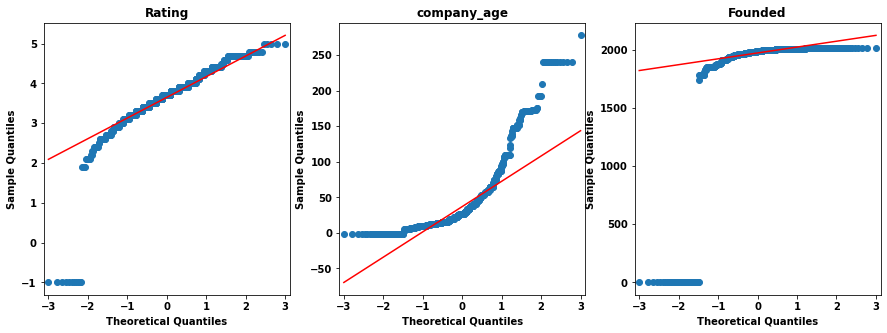

In [11]:
import statsmodels.api as sm

cols = ['Rating', 'company_age', 'Founded']
plt.figure(figsize=(15,5))
for i, col in enumerate(df[cols]):
    ax = plt.subplot(1, 3, i+1)
    ax.set_title(col)
    sm.qqplot(df[col],fit = False, line='q', ax = ax)
plt.show()

In [12]:
df["Rating"] = df["Rating"].fillna(df["Rating"].mean())
df["company_age"] = df["company_age"].fillna(df["company_age"].median())
df["Founded"] = df["Founded"].fillna(df["Founded"].median())

## `-` Encode Categorical Features

In [13]:
df[cat_cols]

,Size,job_simp,Sector,experience_lvl,Type of ownership,job_state,Revenue
0,501 to 1000 employees,data scientist,Aerospace & Defense,na,Company - Private,NM,$50 to $100 million (USD)
1,10000+ employees,data scientist,Health Care,na,Other Organization,MD,$2 to $5 billion (USD)
2,501 to 1000 employees,data scientist,Business Services,na,Company - Private,FL,$100 to $500 million (USD)
3,1001 to 5000 employees,data scientist,"Oil, Gas, Energy & Utilities",na,Government,WA,$500 million to $1 billion (USD)
4,51 to 200 employees,data scientist,Business Services,na,Company - Private,NY,Unknown / Non-Applicable
...,...,...,...,...,...,...,...
737,10000+ employees,na,Biotech & Pharmaceuticals,senior,Company - Public,MA,$10+ billion (USD)
738,1001 to 5000 employees,data engineer,Information Technology,senior,Company - Public,TN,$100 to $500 million (USD)
739,501 to 1000 employees,na,Education,na,College / University,PA,Unknown / Non-Applicable
740,1 to 50 employees,data scientist,Business Services,manager,Company - Private,PA,$5 to $10 million (USD)


In [14]:
dummy_encoded_df = pd.get_dummies(df[cat_cols], drop_first = True)

In [15]:
dummy_encoded_df.head(2)

,Size_10000+ employees,Size_1001 to 5000 employees,Size_201 to 500 employees,Size_5001 to 10000 employees,Size_501 to 1000 employees,Size_51 to 200 employees,Size_Unknown,job_simp_Research Scientist,job_simp_SWE,job_simp_data analyst,...,Revenue_$10+ billion (USD),Revenue_$100 to $500 million (USD),Revenue_$2 to $5 billion (USD),Revenue_$25 to $50 million (USD),Revenue_$5 to $10 billion (USD),Revenue_$5 to $10 million (USD),Revenue_$50 to $100 million (USD),Revenue_$500 million to $1 billion (USD),Revenue_Less than $1 million (USD),Revenue_Unknown / Non-Applicable
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [16]:
# concatenate the numerical and dummy encoded categorical variables column-wise
df_dummy = pd.concat([df[num_cols], dummy_encoded_df], axis=1)

# display data with dummy variables
df_dummy.shape

(742, 124)

## `-` Split predictors 

In [17]:
df_dummy = sm.add_constant(df_dummy)

In [18]:
X = df_dummy.drop(["avg_salary"], axis = 1)
y = df_dummy[["avg_salary"]]

## `-` Feature Selection

In [19]:
from sklearn.feature_selection import SelectKBest, f_regression

select_feature = SelectKBest(f_regression, k=22).fit(X, y)
X2= select_feature.transform(X)


c:\Users\CRIZMA MEGA STORE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## `-` Train Test Split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.2, random_state = 42)
print("shape of X_train :",X_train.shape)
print("shape of X_test  :",X_test.shape)
print("shape of y_train :",y_train.shape)
print("shape of y_test  :",y_test.shape)

shape of X_train : (593, 22)
shape of X_test  : (149, 22)
shape of y_train : (593, 1)
shape of y_test  : (149, 1)


## `-` Evaluation Metrices

In [93]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def adj_r_squared(X, actual: np.ndarray, predicted: np.ndarray): 
  r_squ = r2_score(actual, predicted)
  return (1-(1-r_squ)*((X.shape[0]-1)/(X.shape[0]-X.shape[1]-1)))

    
def Evaluation_report (X_train, Y_train, y_train_pred, X_test, Y_test, y_test_pred):
  print('               :  Train Data     |   Test Data ')
  print('mse            : ', mean_squared_error(Y_train, y_train_pred), '  | ', mean_squared_error(Y_test, y_test_pred))
  print('mae            : ', mean_absolute_error(Y_train, y_train_pred), '  | ',  mean_absolute_error(Y_test, y_test_pred))
  print('r_squared      : ', r2_score(Y_train, y_train_pred), '  | ', r2_score(Y_test, y_test_pred))
  print('adj_r_squared  : ', adj_r_squared(X_train, Y_train, y_train_pred), '  | ', adj_r_squared(X_test, Y_test, y_test_pred))


# `03` Model Building and Tuning

## `-` Decision Tree

In [148]:
# Tune the model
max_depth = [4, 5, 6]
max_features = [x for x in range(1, 5)]
ccp_alpha = [x for x in np.linspace(0.0001, 0.01, num = 5)]

random_grid = {
               'max_depth': max_depth,
               'max_features' : max_features, 
               'ccp_alpha' : ccp_alpha,
               'criterion' : ['absolute_error', 'squared_error']
               }
dt = DecisionTreeRegressor()

In [149]:
grid_search = GridSearchCV(estimator = dt, 
                           param_grid = random_grid, 
                           scoring= 'neg_mean_absolute_error',
                           cv = 3, 
                           verbose = 1).fit(X_train, y_train.values.ravel())
grid_search.best_params_

Fitting 3 folds for each of 120 candidates, totalling 360 fits


{'ccp_alpha': 0.0001,
 'criterion': 'absolute_error',
 'max_depth': 6,
 'max_features': 4}

In [150]:
grid_search.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0001, criterion='absolute_error', max_depth=6,
                      max_features=4)

In [151]:
# build the model
decision_tree = DecisionTreeRegressor(ccp_alpha = 0.001, criterion = 'absolute_error', max_depth = 6, max_features= 4, random_state = 42) 
# fit the model
decision_tree_model = decision_tree.fit(X_train, y_train) 
y_pred_DT=decision_tree_model.predict(X_test)
y_train_pred = decision_tree_model.predict(X_train)
# evaluate the model
Evaluation_report (X_train, y_train, y_train_pred, X_test, y_test, y_pred_DT)

               :  Train Data     |   Test Data 
mse            :  1450.2150084317032   |  1888.2604865771812
mae            :  26.149241146711635   |  30.145973154362416
r_squared      :  0.5027422372557926   |  0.4064337716809262
adj_r_squared  :  0.483549832377946   |  0.3027952238791831


## `-` Random Forest

In [153]:
#Tune the model
n_estimators = [400, 500, 700]
max_depth = [4, 5, 6]
max_samples = [250, 300, 350]
min_samples_split = [5, 10, 15]
max_features = ['sqrt', 'log2']
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'criterion' : ['absolute_error', 'squared_error'],
               'max_samples': max_samples,
               'min_samples_split': min_samples_split,
               'max_features' : max_features
               }
rf = RandomForestRegressor(random_state = 42)

In [154]:
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = random_grid, 
                           scoring= 'neg_mean_absolute_error',
                           cv = 3, 
                           verbose = 1).fit(X_train, y_train.values.ravel())
grid_search.best_params_

Fitting 3 folds for each of 324 candidates, totalling 972 fits


{'criterion': 'absolute_error',
 'max_depth': 6,
 'max_features': 'sqrt',
 'max_samples': 350,
 'min_samples_split': 5,
 'n_estimators': 700}

In [157]:
# build the model
rf_clf = RandomForestRegressor(n_estimators=700,
                                max_depth=6,
                                min_samples_split= 5,
                                max_samples=350,
                                max_features= 'sqrt',
                                criterion = 'absolute_error',
                                bootstrap=True,
                                random_state = 42)
# fit the model
rf_clf.fit(X_train, y_train.values.flatten())
rf_test_pred = rf_clf.predict(X_test)
rf_train_pred = rf_clf.predict(X_train)
# evaluate the model
Evaluation_report(X_train, y_train, rf_train_pred, X_test, y_test, rf_test_pred)

               :  Train Data     |   Test Data 
mse            :  1135.2714807243094   |  1459.2974629400082
mae            :  25.0432480125271   |  28.731011505273248
r_squared      :  0.610731820226601   |  0.5412763772634877
adj_r_squared  :  0.5957074343406101   |  0.46118177646822356


## `-` AdaBoost

In [158]:
from sklearn.ensemble import AdaBoostRegressor
# build the model
adaboost = AdaBoostRegressor(random_state=42)
# fit the model
adaboost.fit(X_train, y_train.values.flatten())
y_test_adaboost  = adaboost.predict(X_test)
y_train_adaboost  = adaboost.predict(X_train)
# evaluate the model
Evaluation_report(X_train, y_train, y_train_adaboost, X_test, y_test, y_test_adaboost)

               :  Train Data     |   Test Data 
mse            :  1578.7243841599222   |  1835.6306141579075
mae            :  32.97896114770735   |  35.76542045219519
r_squared      :  0.45867822999153574   |  0.4229777363991888
adj_r_squared  :  0.4377851090438407   |  0.3222278173577773


## `-` Ensample

In [165]:
from sklearn.ensemble import BaggingRegressor
# build the model
bag_clf = BaggingRegressor(DecisionTreeRegressor(random_state=42), n_estimators=700 , max_samples= 400, bootstrap=True)
# fit the model
bag_clf.fit(X_train, y_train.values.flatten())
y_test_pred = bag_clf.predict(X_test) 
y_train_pred = bag_clf.predict(X_train) 
# evaluate the model
Evaluation_report(X_train, y_train, y_train_pred, X_test, y_test, y_test_pred)

               :  Train Data     |   Test Data 
mse            :  422.4867355620642   |  840.6245257218685
mae            :  14.436731361230038   |  21.173639721876498
r_squared      :  0.8551354056514101   |  0.7357534446586298
adj_r_squared  :  0.8495441406063768   |  0.6896151572180731


c:\Users\CRIZMA MEGA STORE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\CRIZMA MEGA STORE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\CRIZMA MEGA STORE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\CRIZMA MEGA STORE\AppData\Local\Programs\Python\Python39\lib\site-pack

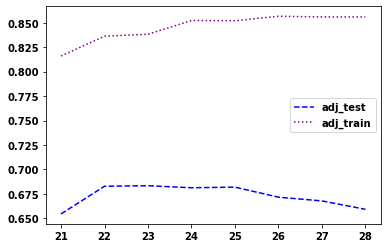

In [140]:
scores = []
scores2 = []
n = [21,22, 23, 24, 25,26,27, 28]

for lambda_ in n:
    X = df_dummy.drop(["avg_salary"], axis = 1)
    y = df_dummy[["avg_salary"]]
    select_feature = SelectKBest(f_regression, k= lambda_).fit(X, y)
    X2= select_feature.transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.2, random_state = 42)


    bag_clf = BaggingRegressor(DecisionTreeRegressor(random_state=42), n_estimators=1000 , max_samples= 350, bootstrap=True, random_state=42)
    # fit the model
    bag_clf.fit(X_train, y_train.values.ravel())
    y_test_pred = bag_clf.predict(X_test) 
    y_train_pred = bag_clf.predict(X_train) 


    adj_test = adj_r_squared(X_test, y_test, y_test_pred)
    adj_train = adj_r_squared(X_train, y_train, y_train_pred)

    scores.append(adj_test)
    scores2.append(adj_train)

plt.plot(n, scores, label = 'adj_test', linestyle ="--", color='blue')
plt.plot(n, scores2, label = 'adj_train', linestyle =":", color='purple')
plt.legend()
plt.show()



In [170]:
import pickle
pickl = {'model': bag_clf}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

y_pred = model.predict(X_test)
adj_r_squared(X_test, y_test, y_pred)

0.6896151572180731